# <center> Prediction using Decision Tree Algorithm<center>

## Task Number : 2
### Prediction Using Supervised Machine Learning
### Author: Aravind Mohan

**● Create the Decision Tree classifier and visualize it graphically.**

**● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

Dataset: **Iris**

#### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

#### 2. Load Data

In [2]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data was successfully loaded

#### 3. Converting Target Variable

In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

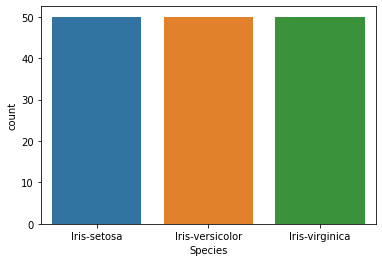

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species',data=df)
plt.show()

We can see that it is a multivariate classiffication problem and we can also see that the three classes are equally divided.

In [6]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2})

#### 4. Checking Null Values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the data.

#### 5. Splitting the Data (70-30)

In [8]:
X = df.drop('Species',axis=1)
y = df['Species']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

The data was split into train and test, with a 70:30 ratio.

#### 6. Building the model

Below we will build a model using the Decision Tree Classifier algorithm from the sci-kit learn module.

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_train_pred=dtc.predict(X_train)

print('Train')
print('F1 Score:',f1_score(y_train,y_train_pred,average='weighted'))
print('Accuracy Score:',accuracy_score(y_train,y_train_pred))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred))

y_test_pred=dtc.predict(X_test)

print('\n\nTest')
print('F1 Score:',f1_score(y_test,y_test_pred,average='weighted'))
print('Accuracy Score:',accuracy_score(y_test,y_test_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred))

Train
F1 Score: 1.0
Accuracy Score: 1.0
Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]


Test
F1 Score: 1.0
Accuracy Score: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Visualizing the Decision Tree Algorithm:

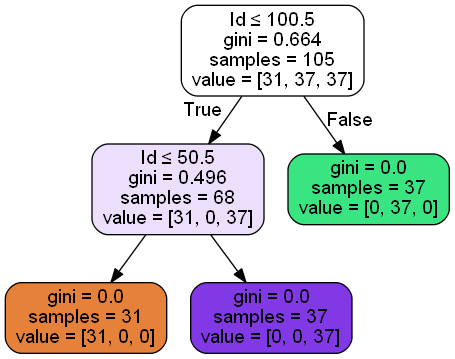

In [12]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

As you can see, the model that has been built here predicts the classes very well. The train and test scores are similar. Considering the data we have with us the model built is very good.

But you can see that the accuracy scores is perfect indicating data leak or that the data we have here is not diverse enough. We need a larger amount of data to understand the features better and predict the classes.